# Temporal Data EDA
This notebook is going to do an analysis of the master df to do some EDA and extract corrolations/findings from the data.

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
#read and create a copy of the master df
temporal_master_df = pd.read_csv('master_gdf.csv')

/var/folders/qs/jplgv2c13rsf824x59pq_29r0000gn/T/ipykernel_27995/133870185.py:2: DtypeWarning: Columns (37,39,40,44,45,46,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  temporal_master_df = pd.read_csv('master_gdf.csv')


In [99]:
temp_df_copy =temporal_master_df.copy()
temp_df_copy.head()

,ACCNUM,YEAR,DATE,TIME,collision_datetime,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,...,hourly_ex_peds,hourly_wx_peds,hourly_nx_bike,hourly_sx_bike,hourly_ex_bike,hourly_wx_bike,hourly_nx_other,hourly_sx_other,hourly_ex_other,hourly_wx_other
0,1237939.0,2011.0,2011-03-09,726,2011-03-09 07:26:00,COLLEGE Stre,BATHURST Stre,NaN,Major Arterial,Toronto and East York,...,208.0,160.0,50.0,2.0,43.0,312.0,0.0,0.0,0.0,0.0
1,1232522.0,2011.0,2011-03-09,1145,2011-03-09 11:45:00,JANE ST,ST JOHNS RD,NaN,Major Arterial,Toronto and East York,...,59.0,36.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0
2,1232522.0,2011.0,2011-03-09,1145,2011-03-09 11:45:00,JANE ST,ST JOHNS RD,NaN,Major Arterial,Toronto and East York,...,59.0,36.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0
3,1232522.0,2011.0,2011-03-09,1145,2011-03-09 11:45:00,JANE ST,ST JOHNS RD,NaN,Major Arterial,Toronto and East York,...,59.0,36.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0
4,1222866.0,2011.0,2011-03-12,1917,2011-03-12 19:17:00,CHURCH ST,GOULD ST,NaN,Minor Arterial,Toronto and East York,...,222.0,97.0,106.0,27.0,31.0,9.0,0.0,0.0,0.0,0.0


In [100]:
# List columns
col_list = list(temp_df_copy.columns)
print(col_list)
print(temp_df_copy.shape)

['ACCNUM', 'YEAR', 'DATE', 'TIME', 'collision_datetime', 'STREET1', 'STREET2', 'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'WARDNUM', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140', 'DIVISION', 'collision_geometry', 'count_datetime', 'count_location', 'count_geometry', 'daily_sb_cars_r', 'daily_sb_cars_t', 'daily_sb_cars_l', 'daily_nb_cars_r', 'daily_nb_cars_t', 'daily_nb_cars_l', 'daily_wb_cars_r', 'daily_wb_cars_t', 'daily_wb_cars_l', 'daily_eb_cars_r', 'daily_eb_cars_t', 'daily_eb_cars_l', 'daily_sb_truck_r', 'daily_sb_truck_t', 'daily_sb_truck_l', 'daily

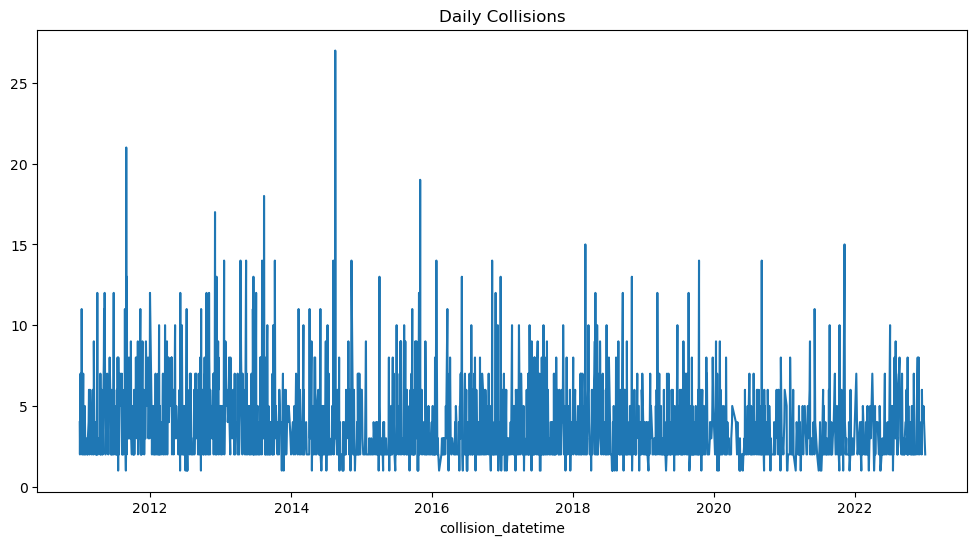

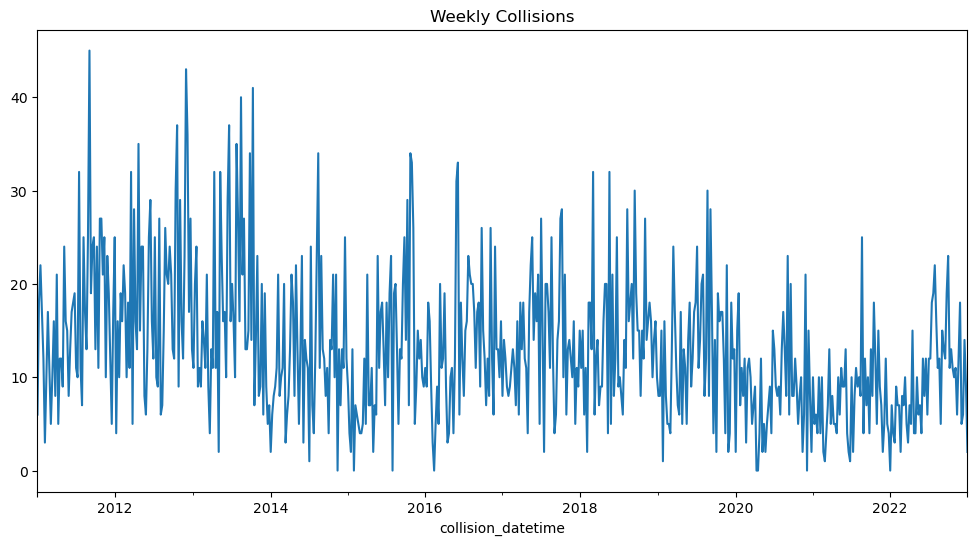

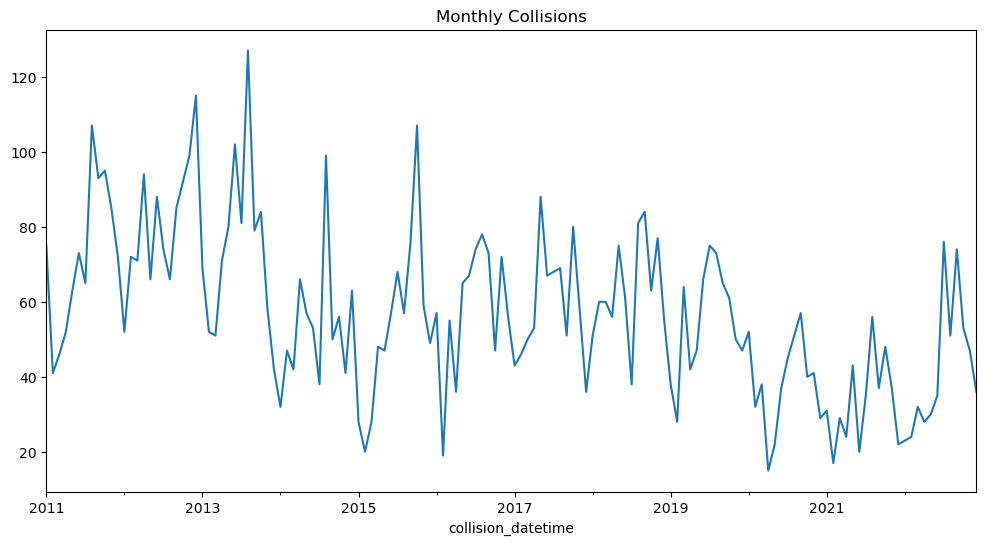

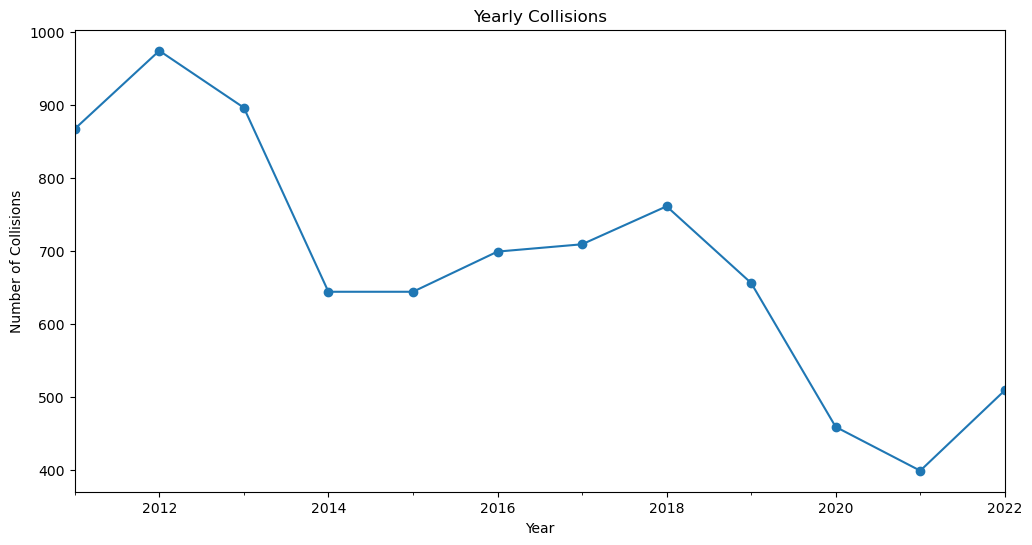

In [124]:
# Ensure 'collision_datetime' column is in datetime format
temp_df_copy['collision_datetime'] = pd.to_datetime(temp_df_copy['collision_datetime'], format='%Y-%m-%d %H:%M:%S')

# Subset Data
subset_columns = ['collision_datetime', 'INJURY', 'ACCNUM']
subset_data = temp_df_copy[subset_columns]

# Daily Time Series - number of collisions per day
daily_counts = subset_data.groupby(subset_data['collision_datetime'].dt.date).size()
daily_counts.plot(title='Daily Collisions', figsize=(12, 6))
plt.show()

# Weekly Time Series - number of collisions per week
weekly_counts = subset_data.resample('W-Mon', on='collision_datetime').size()
weekly_counts.plot(title='Weekly Collisions', figsize=(12, 6))
plt.show()

# Monthly Time Series - number of collisions per month
monthly_counts = subset_data.resample('M', on='collision_datetime').size()
monthly_counts.plot(title='Monthly Collisions', figsize=(12, 6))
plt.show()

# Annual Time Series - number of collisions per year
yearly_counts = subset_data.resample('Y', on='collision_datetime').size()
yearly_counts.plot(title='Yearly Collisions', figsize=(12, 6), marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Collisions')
plt.show()

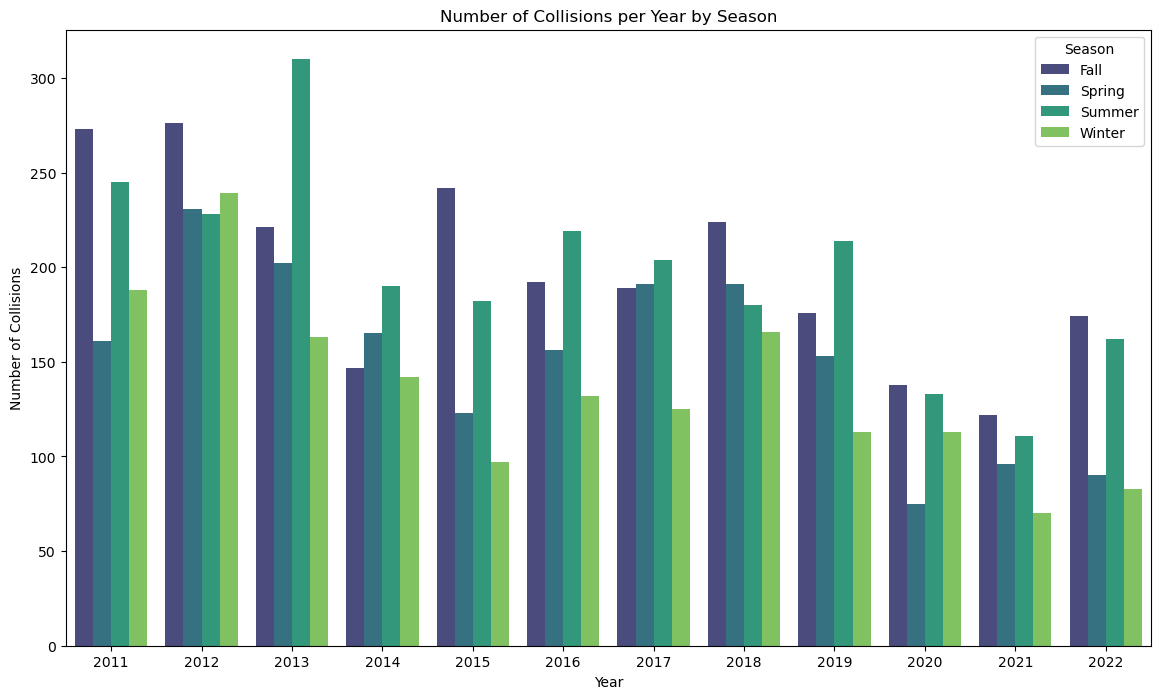

Number of Collisions per Year and Season (Counting each row as a collision):
    Year  Season  Collisions
0   2011    Fall         273
1   2011  Spring         161
2   2011  Summer         245
3   2011  Winter         188
4   2012    Fall         276
5   2012  Spring         231
6   2012  Summer         228
7   2012  Winter         239
8   2013    Fall         221
9   2013  Spring         202
10  2013  Summer         310
11  2013  Winter         163
12  2014    Fall         147
13  2014  Spring         165
14  2014  Summer         190
15  2014  Winter         142
16  2015    Fall         242
17  2015  Spring         123
18  2015  Summer         182
19  2015  Winter          97
20  2016    Fall         192
21  2016  Spring         156
22  2016  Summer         219
23  2016  Winter         132
24  2017    Fall         189
25  2017  Spring         191
26  2017  Summer         204
27  2017  Winter         125
28  2018    Fall         224
29  2018  Spring         191
30  2018  Summer        

In [127]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Extract Year and Season
temp_df_copy['Year'] = temp_df_copy['collision_datetime'].dt.year
temp_df_copy['Season'] = temp_df_copy['collision_datetime'].dt.month.apply(lambda month: (
    'Winter' if month in [12, 1, 2] else
    'Spring' if month in [3, 4, 5] else
    'Summer' if month in [6, 7, 8] else
    'Fall'
))

# Subset Data
subset_columns = ['Year', 'Season', 'ACCNUM']
subset_data = temp_df_copy[subset_columns]

# Count the number of rows for each Year and Season (unique combinations)
seasonal_counts_corrected = subset_data.groupby(['Year', 'Season']).size().reset_index(name='Collisions')

# Plotting using Seaborn
plt.figure(figsize=(14, 8))
sns.barplot(data=seasonal_counts_corrected, x='Year', y='Collisions', hue='Season', palette='viridis', ci=None)
plt.title('Number of Collisions per Year by Season')
plt.xlabel('Year')
plt.ylabel('Number of Collisions')
plt.legend(title='Season', loc='upper right')
plt.show()

# Display the corrected numerical information
print("Number of Collisions per Year and Season (Counting each row as a collision):")
print(seasonal_counts_corrected)

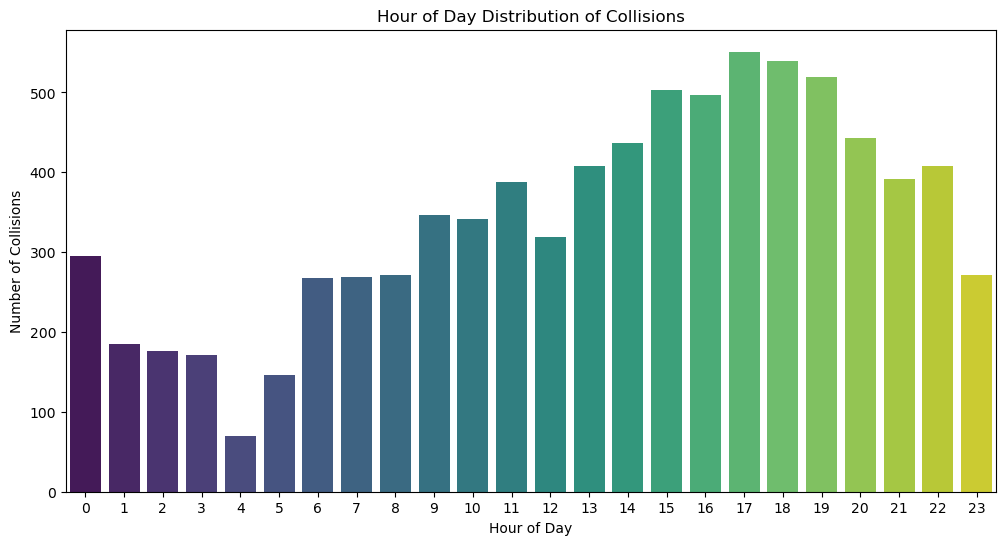

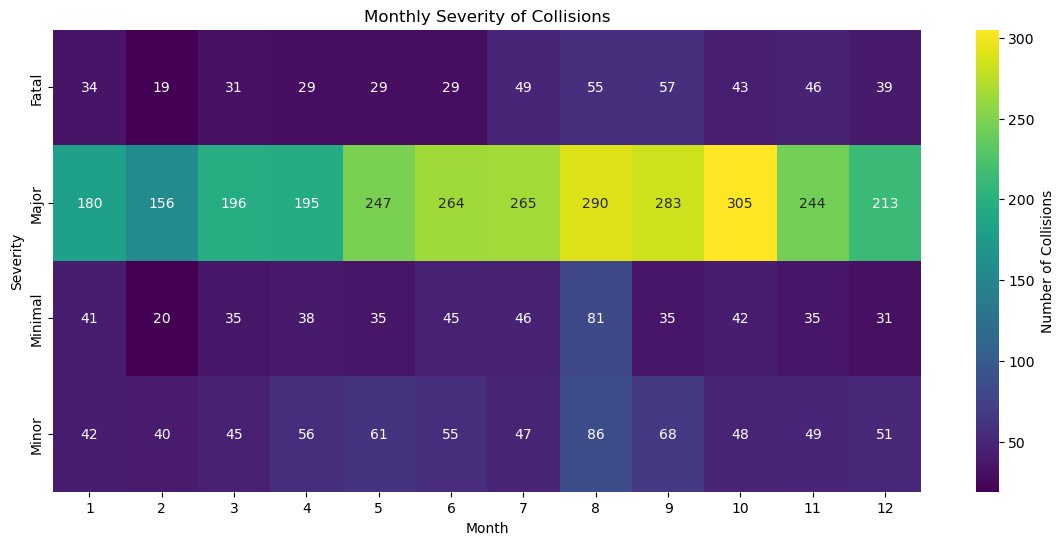

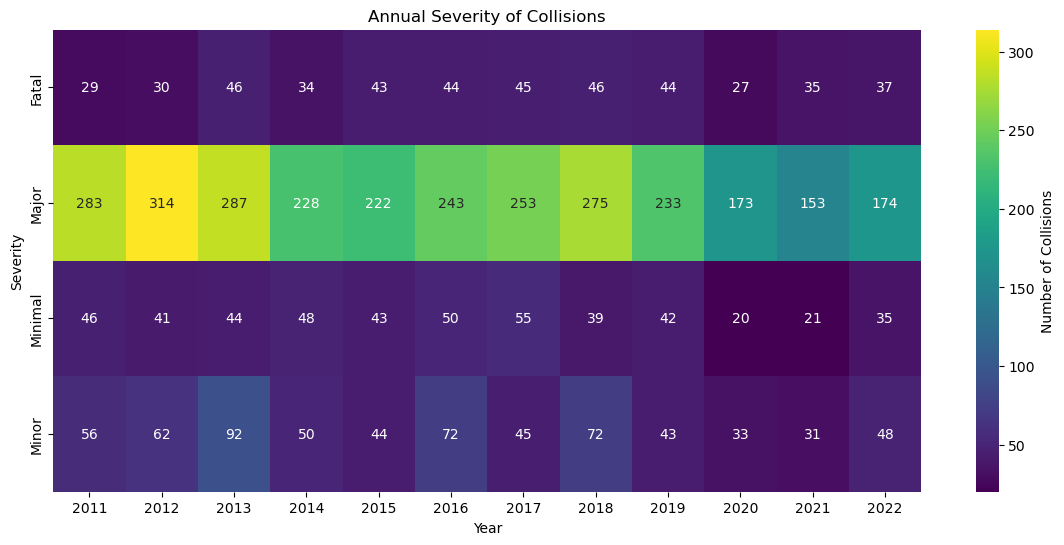

In [146]:
# Extract Week, Month, and Year
temp_df_copy['Week'] = temp_df_copy['collision_datetime'].dt.isocalendar().week
temp_df_copy['Month'] = temp_df_copy['collision_datetime'].dt.month
temp_df_copy['Year'] = temp_df_copy['collision_datetime'].dt.year

# Map severity levels to colors
severity_color_map = {'Minimal': 'green', 'Minor': 'yellow', 'Major': 'red'}

# Create a pivot table for the heatmap
heatmap_data_monthly = temp_df_copy.pivot_table(index='INJURY', columns='Month', values='collision_datetime', aggfunc='count')
heatmap_data_annual = temp_df_copy.pivot_table(index='INJURY', columns='Year', values='collision_datetime', aggfunc='count')

# Create a new column for the hour of the day
temp_df_copy['HourOfDay'] = temp_df_copy['collision_datetime'].dt.hour

# Group by Hour of Day and calculate the count of occurrences
hourofday_counts = temp_df_copy.groupby('HourOfDay').size().reset_index(name='Collisions')

# Plotting Hour of Day Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=hourofday_counts, x='HourOfDay', y='Collisions', palette='viridis')
plt.title('Hour of Day Distribution of Collisions')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Collisions')
plt.show()

## NOTE - note all collisions (rows) have a value indicating severity -> counts may not sum to total

# Plotting Monthly Heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data_monthly, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Number of Collisions'})
plt.title('Monthly Severity of Collisions')
plt.xlabel('Month')
plt.ylabel('Severity')
plt.show()

# Plotting Annual Heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data_annual, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Number of Collisions'})
plt.title('Annual Severity of Collisions')
plt.xlabel('Year')
plt.ylabel('Severity')
plt.show()


In [154]:
# Aggregate by Day
daily_aggregated = temp_df_copy.groupby(temp_df_copy['collision_datetime'].dt.date).size()

# Aggregate by Week
weekly_aggregated = temp_df_copy.resample('W-Mon', on='collision_datetime').size()

# Aggregate by Month
monthly_aggregated = temp_df_copy.resample('M', on='collision_datetime').size()

# Aggregate by Year
yearly_aggregated = temp_df_copy.resample('Y', on='collision_datetime').size()

# Statistical Analysis
daily_stats = daily_aggregated.describe()
weekly_stats = weekly_aggregated.describe()
monthly_stats = monthly_aggregated.describe()
yearly_stats = yearly_aggregated.describe()

# Display statistical summaries
print("Daily Stats:")
print(daily_stats)
print("\nWeekly Stats:")
print(weekly_stats)
print("\nMonthly Stats:")
print(monthly_stats)
print("\nYearly Stats:")
print(yearly_stats)

Daily Stats:
count    2141.000000
mean        3.837926
std         2.508747
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        27.000000
dtype: float64

Weekly Stats:
count    627.000000
mean      13.105263
std        7.826703
min        0.000000
25%        7.000000
50%       12.000000
75%       17.500000
max       45.000000
dtype: float64

Monthly Stats:
count    144.000000
mean      57.062500
std       21.932579
min       15.000000
25%       41.000000
50%       56.000000
75%       72.000000
max      127.000000
dtype: float64

Yearly Stats:
count     12.000000
mean     684.750000
std      174.711255
min      399.000000
25%      610.250000
50%      677.500000
75%      787.500000
max      974.000000
dtype: float64
